In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load the dataset using the Python engine and handle potential quoting issues
# The error suggests an issue on line 22, so error_bad_lines will skip it and continue
data = pd.read_csv('IMDB Dataset.csv', engine='python', quoting=3, on_bad_lines='skip')

# Check the data
data.head()

# To identify the problematic lines you can iterate over the file and check the number of delimiters
# Remember to replace ',' with the actual delimiter in your file
# with open('IMDB Dataset.csv', 'r') as f:
#     for i, line in enumerate(f):
#         if len(line.split(',')) != 28:
#             print(f'Line {i+1}: {line}')

,,,,,,,,,,,,,,,,,,,,,,,,,,review,sentiment
"""One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right",as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence,which set in right from the word GO. Trust me,this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs,sex or violence. Its is hardcore,in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City,an experimental section of the prison where all the cells have glass fronts and face inwards,so privacy is not high on the agenda. Em City is home to many..Aryans,Muslims,gangstas,Latinos,Christians,Italians,Irish and more....so scuffles,death stares,dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences,forget charm,forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal,I couldn't say I was ready for it,but as I watched more,I developed a taste for Oz,and got accustomed to the high levels of graphic violence. Not just violence,but injustice (crooked guards who'll be sold out for a nickel,inmates who'll kill on order and get away with it,well mannered,middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz,you may become comfortable with what is uncom...,positive
"""A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting",and sometimes discomforting,"sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only """"has got all the polari"""" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries",not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which,rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses,"particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.""",positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
"""I thought this was a wonderful way to spend time on a too hot summer weekend",sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic,but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction,I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson,"in this she managed to tone down her """"sexy"""" image and jumped right into a average",but spirited young woman.<br /><br />This may not be the crown jewel of his career,"but it was wittier than """"Devil Wears Prada"""" and more interesting than """"Superman"""" a great comedy to go see with friends.""",positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
"""Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the tim

In [7]:
# Convert labels (positive/negative) to numeric values
label_encoder = LabelEncoder()
data['sentiment'] = label_encoder.fit_transform(data['sentiment'])

# Text preprocessing: remove special characters, lowercase, etc.
import re

def preprocess_text(text):
    # Ensure text is a string
    text = str(text)
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower()  # Lowercase the text
    return text

data['review'] = data['review'].apply(preprocess_text)

In [8]:
# Tokenize the text
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(data['review'])
sequences = tokenizer.texts_to_sequences(data['review'])

# Pad the sequences to make them the same length
max_length = 200  # You can choose a different max length
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, data['sentiment'], test_size=0.2, random_state=42)

In [9]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=64, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary of the model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=32)


Epoch 1/5
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.0038 - loss: -68346.6016 - val_accuracy: 0.0054 - val_loss: -1058344.1250
Epoch 2/5
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.0035 - loss: -2119053.2500 - val_accuracy: 0.0054 - val_loss: -6959858.0000
Epoch 3/5
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.0043 - loss: -9639445.0000 - val_accuracy: 0.0054 - val_loss: -19643238.0000
Epoch 4/5
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.0038 - loss: -24207980.0000 - val_accuracy: 0.0054 - val_loss: -40126380.0000
Epoch 5/5
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.0039 - loss: -46848456.0000 - val_accuracy: 0.0054 - val_loss: -69295592.0000


In [11]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


288/288 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0060 - loss: -69324536.0000
Test Accuracy: 0.54%


In [13]:
# Example of testing the model on new data
new_review = ["This movie was fantastic! The acting was great and the story was thrilling."]
new_sequence = tokenizer.texts_to_sequences(new_review)
padded_new_sequence = pad_sequences(new_sequence, maxlen=max_length, padding='post')

# Predict sentiment
prediction = model.predict(padded_new_sequence)
print("Positive" if prediction > 0.5 else "Negative")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Positive


In [14]:
# Load the GloVe embeddings
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

# Load the 100D GloVe vectors
embedding_index = {}
with open('glove.6B.100d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = vector

# Create an embedding matrix
embedding_dim = 100
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

# Update model to use GloVe embeddings
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim,
                              input_length=max_length,
                              weights=[embedding_matrix], trainable=False),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile and train as before
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


--2024-10-07 10:08:16--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-10-07 10:08:16--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-10-07 10:08:17--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [15]:
# Define model with LSTM layer
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length, weights=[embedding_matrix], trainable=False),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile and train the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [16]:
# Compile the enhanced model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), batch_size=32)


Epoch 1/5
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 322s 271ms/step - accuracy: 0.0035 - loss: -1195.6442 - val_accuracy: 0.0054 - val_loss: -9835.7900
Epoch 2/5
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 326s 275ms/step - accuracy: 0.0038 - loss: -15259.9492 - val_accuracy: 0.0054 - val_loss: -35166.1836
Epoch 3/5
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 315s 269ms/step - accuracy: 0.0042 - loss: -43705.6211 - val_accuracy: 0.0054 - val_loss: -72171.0781
Epoch 4/5
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 328s 274ms/step - accuracy: 0.0040 - loss: -83390.3984 - val_accuracy: 0.0054 - val_loss: -119155.7031
Epoch 5/5
1150/1150 ━━━━━━━━━━━━━━━━━━━━ 316s 269ms/step - accuracy: 0.0038 - loss: -132768.9062 - val_accuracy: 0.0054 - val_loss: -175233.0156


In [17]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


288/288 ━━━━━━━━━━━━━━━━━━━━ 23s 79ms/step - accuracy: 0.0060 - loss: -175236.7969
Test Accuracy: 0.54%


288/288 ━━━━━━━━━━━━━━━━━━━━ 35s 120ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        32
           1       0.01      1.00      0.01        50
           2       0.00      0.00      0.00      9118

    accuracy                           0.01      9200
   macro avg       0.00      0.33      0.00      9200
weighted avg       0.00      0.01      0.00      9200



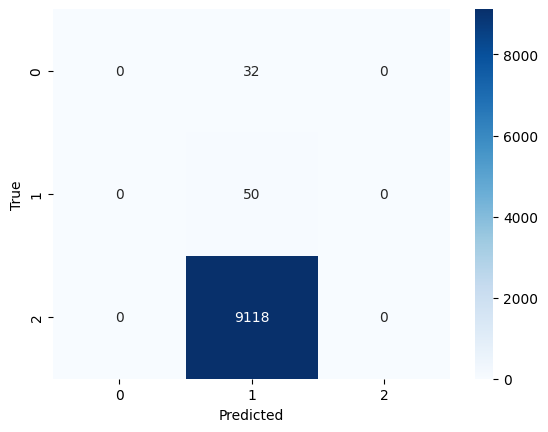

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Generate classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


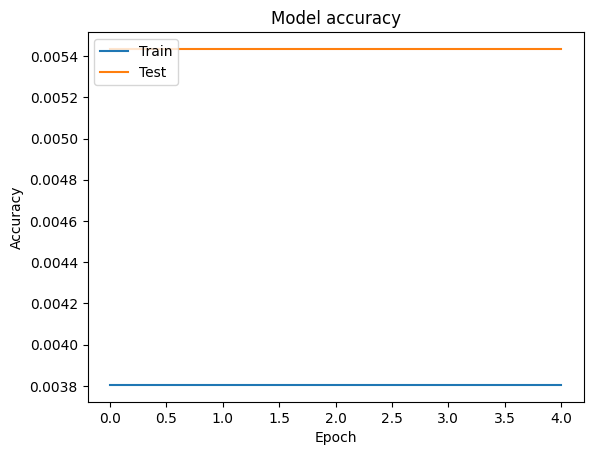

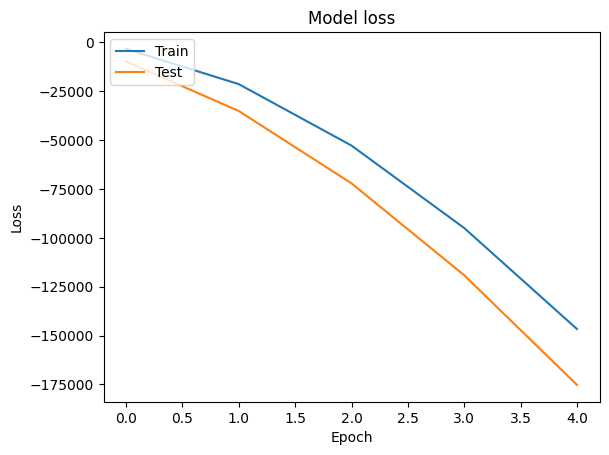

In [19]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [20]:
# Example of testing the model on a new review
new_review = ["The movie was absolutely fantastic! Loved every moment."]
new_sequence = tokenizer.texts_to_sequences(new_review)
padded_new_sequence = pad_sequences(new_sequence, maxlen=max_length, padding='post')

# Predict sentiment
prediction = model.predict(padded_new_sequence)
print("Positive" if prediction > 0.5 else "Negative")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
Positive
